# CESM Control vs Forcing Runs

How appropriate is it to use the control run as a climatology

In [4]:
#import my functions
import sys
sys.path.append('../')

import utils._modelDefinitions as _model


In [24]:
import xarray
import matplotlib.pyplot as plt
import numpy
import scipy.stats

%matplotlib inline

In [7]:
# Here is the data
indecesXr = xarray.load_dataset('../results/cesmTradIndeces.nc')

indecesXr.experiment.values

array(['LME.002', 'LME.003', 'LME.008', 'LME.009', '0850cntl.001', '001',
       '002', '003', '004', '005', '006', '007', '008', '009', '010',
       '011', '012', '013'], dtype=object)

In [8]:
indecesXr

<xarray.Dataset>
Dimensions:          (experiment: 18, year: 1250)
Coordinates:
  * year             (year) int64 850 851 852 853 854 ... 2096 2097 2098 2099
  * experiment       (experiment) object 'LME.002' 'LME.003' ... '012' '013'
Data variables:
    dmi              (experiment, year) float64 0.9455 1.903 -0.352 ... nan nan
    eastIO           (experiment, year) float64 -0.4062 -1.1 0.428 ... nan nan
    nino34NoDetrend  (experiment, year) float64 0.5649 -0.5219 ... nan nan
    nino34           (experiment, year) float64 0.4477 -0.447 ... nan nan
    sam              (experiment, year) float64 -1.059 0.2726 0.2454 ... nan nan
    nino4NoDetrend   (experiment, year) float64 0.6418 -0.3102 ... nan nan
    nino4            (experiment, year) float64 0.5246 -0.2353 ... nan nan
    eastIONoDetrend  (experiment, year) float64 -0.3048 -1.163 ... nan nan
Attributes:
    nino34NoDetrend:  [ 7 15]
    nino4NoDetrend:   [ 7 15]
    eastIONoDetrend:  [ 7 12]
    dmi:              [ 7 12]
    nino34:           [ 7 15]
    nino4:            [ 7 15]
    eastIO:           [ 7 12]
    sam:              [10 15]
    lat1:             [10 15]
    lat2:             [10 15]
    precAnom:         [ 9 15]
    tsAnom:           [ 9 15]

In [62]:
list(indecesXr.data_vars)

['dmi',
 'eastIO',
 'nino34NoDetrend',
 'nino34',
 'sam',
 'nino4NoDetrend',
 'nino4',
 'eastIONoDetrend']

In [68]:
cntlHist[1]

array([-2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5])

dmi


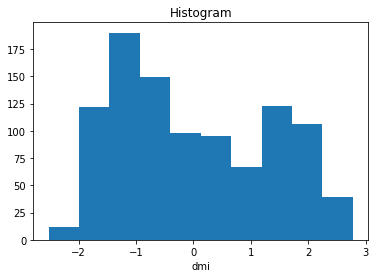

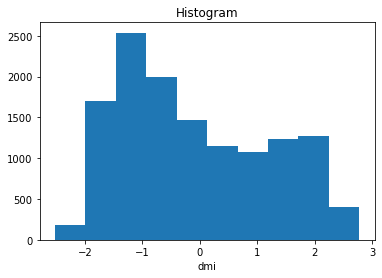

Power_divergenceResult(statistic=0.018078886301158583, pvalue=0.9999999999879616)
eastIO


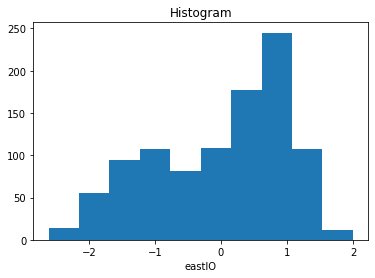

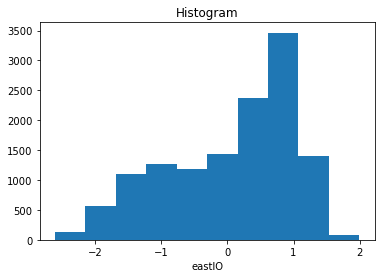

Power_divergenceResult(statistic=0.013713483921921753, pvalue=0.9999999999965228)
nino34NoDetrend


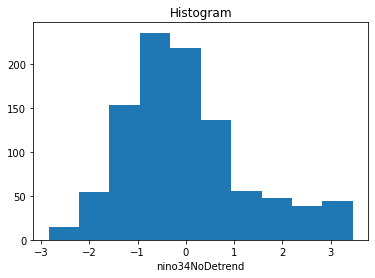

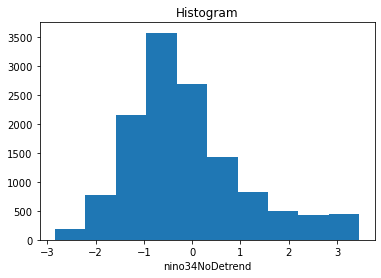

Power_divergenceResult(statistic=0.020076206596581332, pvalue=0.9999999999807243)
nino34


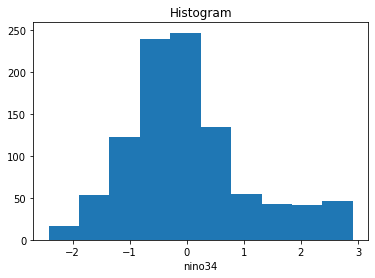

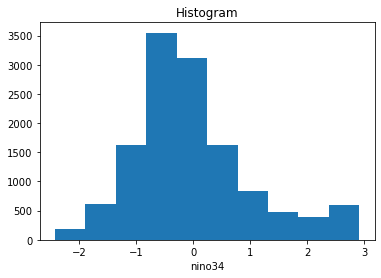

Power_divergenceResult(statistic=0.014454297836823006, pvalue=0.9999999999955952)
sam


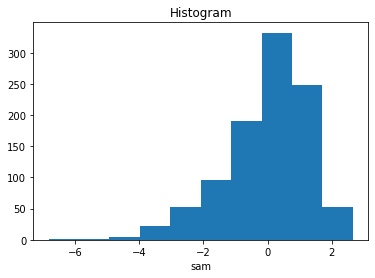

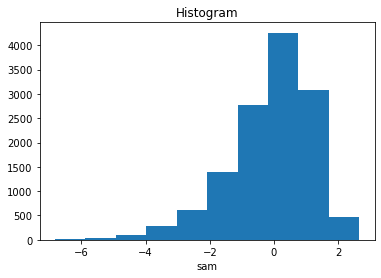

Power_divergenceResult(statistic=0.013296489527632818, pvalue=0.9999999999969733)
nino4NoDetrend


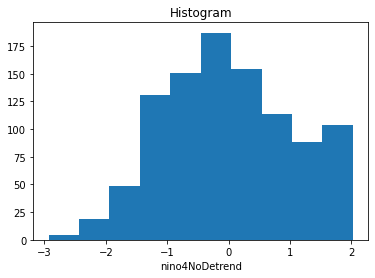

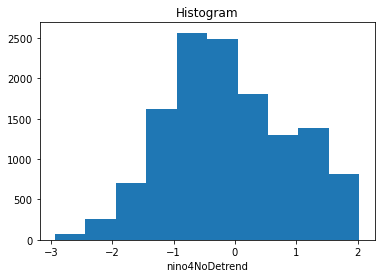

Power_divergenceResult(statistic=0.04634278757931104, pvalue=0.9999999991773841)
nino4


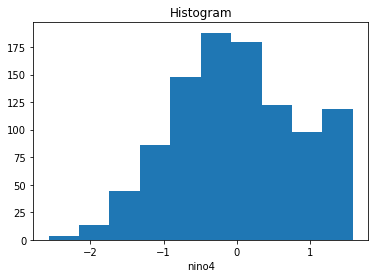

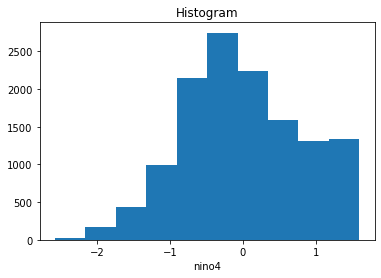

Power_divergenceResult(statistic=0.011949217282238196, pvalue=0.9999999999981275)
eastIONoDetrend


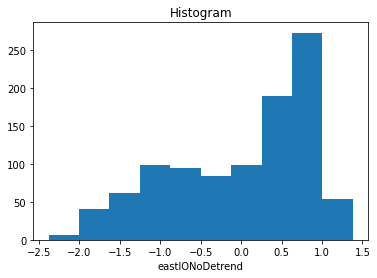

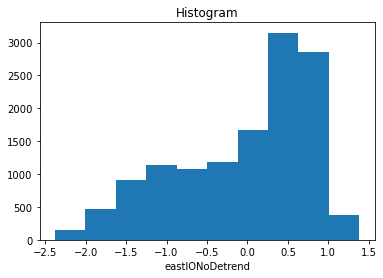

Power_divergenceResult(statistic=0.06069223672406207, pvalue=0.9999999972468553)


In [69]:
for iIndex in list(indecesXr.data_vars):
    
    print(iIndex)
    
    plt.figure()
    
    cntlHist = indecesXr[iIndex].sel(
        experiment=_model.cesmCntl, year=slice(850,1850)
             ).plot.hist()
    
    plt.show()
    
    plt.figure()

    meanHist = indecesXr[iIndex].sel(
        experiment=_model.cesmFullForcings, year=slice(850,1850)
                 ).plot.hist(bins=cntlHist[1])

    plt.show()
    
    cntlHist[0]/cntlHist[0].sum()

    meanHist[0]/meanHist[0].sum()

    print(
        scipy.stats.chisquare(cntlHist[0]/cntlHist[0].sum(), 
                          f_exp=meanHist[0]/meanHist[0].sum())
    )